# Introduction
This notebook cleans and analyzes the data for the Yu-Gi-Oh December 2024 competitive season from weeks 1 - 9. The competitive season generally starts and ends when a new banlist takes effect.
The data includes "tops" from Tier 2+ events (Regionals, YCS, Opens).
A "top" in most cases is a placement in the top 8 players at the tournament for regional and open level tournaments, or in the top 32/64 players (depending on event size) for YCS level tournaments.


## Cleaning
The data was taken from Ivan Campos who compiles topping decks into a weekly spreadsheet. I combined the spreadsheets from week 1 - 9 into one CSV file and got rid of irrelevant data for analysis (YouTube links, Deck profile links...). The following code block removes empty rows and 'Unknown' and 'Deck' deck types from the combined CSV. Since the data includes some entries which are similar or entries that are simply misspelled those are combined into their correct label.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV and specify na_values
data = pd.read_csv('DEC24-25-W1-W9.csv', encoding='ISO-8859-1', delimiter=';', na_values=['', 'NaN'], keep_default_na=False)

# Create DataFrame
df = pd.DataFrame(data)

# Replace empty strings with NaN and drop rows where all elements are NaN
df_clean = df.replace('', pd.NA).dropna(how='all')

# Remove "place" from 1st and 2nd
df_clean['Place'] = df_clean['Place'].str.replace('1st Place', '1st')
df_clean['Place'] = df_clean['Place'].str.replace('2nd Place', '2nd')

# Remove "Unknown" and "Deck" values from Deck types
remove_deck = ['Unknown', 'Deck']
df_clean = df_clean[~df_clean['Deck'].isin(remove_deck)]


# Correct similar engine names
correction = {
    'Sky striker': 'Sky Striker',
    'Sky Stricker': 'Sky Striker',
    'Azamina SE' : 'Azamina',
    'Azamina FS' : 'Azamina',
    'Azamina Kash': 'Azamina',
    'Fiendsmith Kash' : 'Fiendsmith',
    'Fiendsmith bystial' : 'Fiendsmith Bystial',
    'Fiendmisth' : 'Fiendsmith',
    'Sharks' : 'Shark',
    'ToyBox' : 'Toy Box',
}

df_clean['Engine'] = df_clean['Engine'].replace(correction)

# Print number of decks and engines used
deck_count = df_clean['Deck'].value_counts()
engine_count = df_clean['Engine'].value_counts()

print(deck_count)
print(" ")
print(engine_count)

# Save DataFrame to CSV
#df_clean.to_csv('DEC24-25-W1-W9_clean.csv', index=False)

Deck
Ryzeal               437
Maliss               194
Tenpai Dragon         48
Kashtira              27
Yubel                 23
Memento               22
White Forest          16
Mermail               13
Fiendsmith            12
Voiceless Voice       12
Crystron              11
Labrynth              10
Fire King              6
Goblin Biker           6
Centur-Ion             6
Magical Musketeer      6
Ritual Beast           4
Primite                3
Plant Link             3
Dinomorphia            3
Branded                3
Rescue-ACE             3
Dragon Link            2
Floowandereeze         2
Bystial                2
Stun                   2
Orcust                 2
Mimighoul              2
Dark World             2
Melodious              2
Gimmick Puppet         2
Blackwing              2
Virtual World          1
Phantom Knight         1
Salamangreat           1
Ice Barrier            1
Ogdoadic               1
Vanquish Soul          1
Chimera                1
Thunder Dragon      

## Plotting data


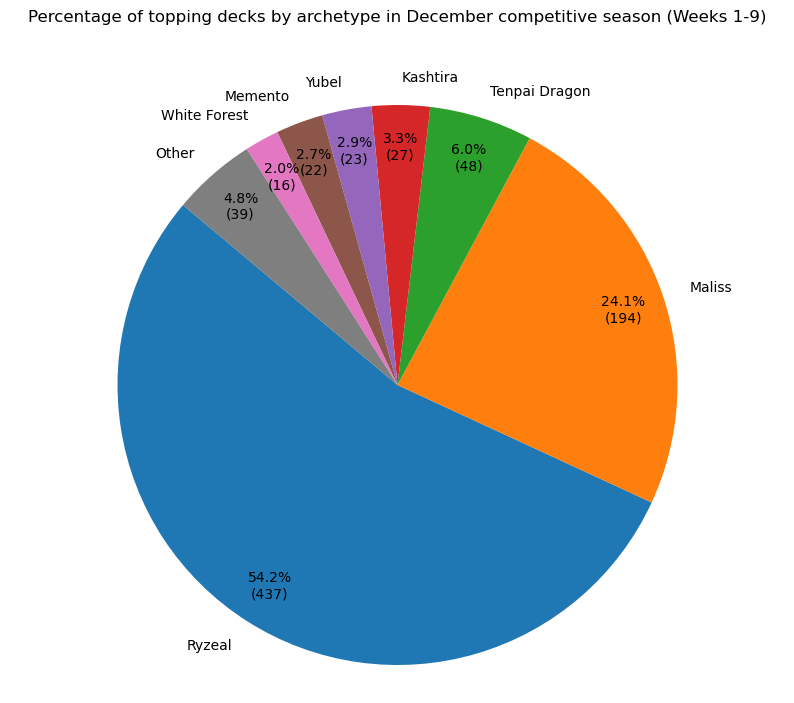

In [2]:
# Use the cleaned CSV
df_clean = pd.read_csv('DEC24-25-W1-W9_clean.csv' , encoding='ISO-8859-1', delimiter=';', na_values=['', 'NaN'], keep_default_na=False, skiprows=1)

# Print DataFrame
#print(df_clean.to_string(index=False))

# Filter deck types with less than 15 occurrences and group them into "Other"
other_deck = deck_count.copy()
other_deck[other_deck < 15] = 0
other_deck['Other'] = (deck_count < 15).sum()
other_deck = other_deck[other_deck > 0]

# Plot pie chart with percentage and number of topping decks by archetype
total_deck = sum(other_deck)
plt.figure(figsize=(10, 8))
plt.pie(other_deck, labels=other_deck.index, autopct=lambda pct:f'{pct:.1f}%\n({int(round(pct * total_deck / 100.0))})', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.axis('equal')

plt.title('Percentage of topping decks by archetype in December competitive season (Weeks 1-9)', pad=40)
plt.show()


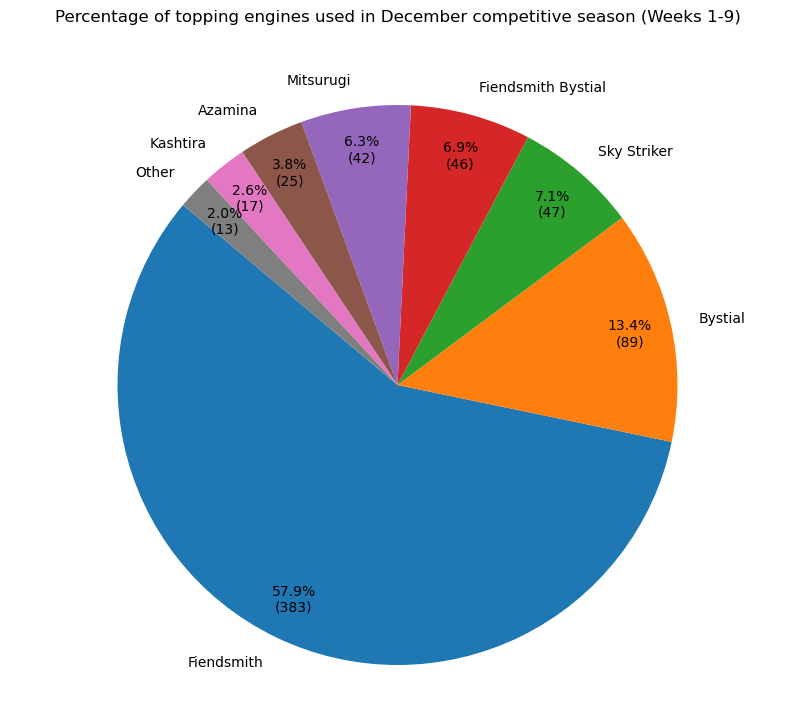

In [3]:
# Filter engine types with less than 15 occurrences and group them into "Other"
other_engine = engine_count.copy()
other_engine[other_engine < 15] = 0
other_engine['Other'] = (engine_count < 15).sum()
other_engine = other_engine[other_engine > 0]

# Remove 'No engine' from pie chart
other_engine = other_engine[other_engine.index != 'No Engine']

# Plot pie chart with percentage and number of topping engines used
total_engine = sum(other_engine)
plt.figure(figsize=(10, 8))
plt.pie(other_engine, labels=other_engine.index, autopct=lambda pct:f'{pct:.1f}%\n({int(round(pct * total_engine / 100.0))})', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.axis('equal')

plt.title('Percentage of topping engines used in December competitive season (Weeks 1-9)', pad=40)
plt.show()

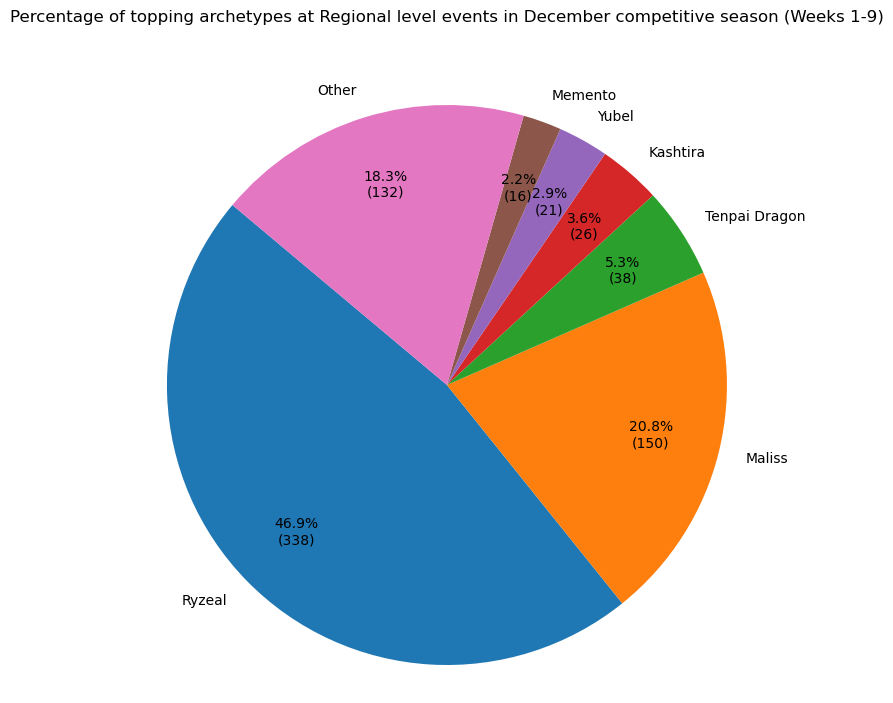

In [4]:
regional_df = df_clean[df_clean['Event'].str.contains('Regional', case=False, na=False)]
regional_deck = regional_df['Deck'].value_counts()

# Filter deck types with less than 5 occurrences and group them into "Other"
other_deck = regional_deck.copy()
other_deck[other_deck < 15] = 0
other_deck['Other'] = regional_deck[regional_deck < 15].sum()
other_deck = other_deck[other_deck > 0]

# Plot pie chart with percentage and number of topping decks at YCS level events
total_regional_deck = sum(regional_deck)
plt.figure(figsize=(10, 8))
plt.pie(other_deck, labels=other_deck.index, autopct=lambda pct:f'{pct:.1f}%\n({int(round(pct * total_regional_deck / 100.0))})', startangle=140, pctdistance=0.75, labeldistance=1.1)
plt.axis('equal')

plt.title('Percentage of topping archetypes at Regional level events in December competitive season (Weeks 1-9)', pad=40)
plt.show()

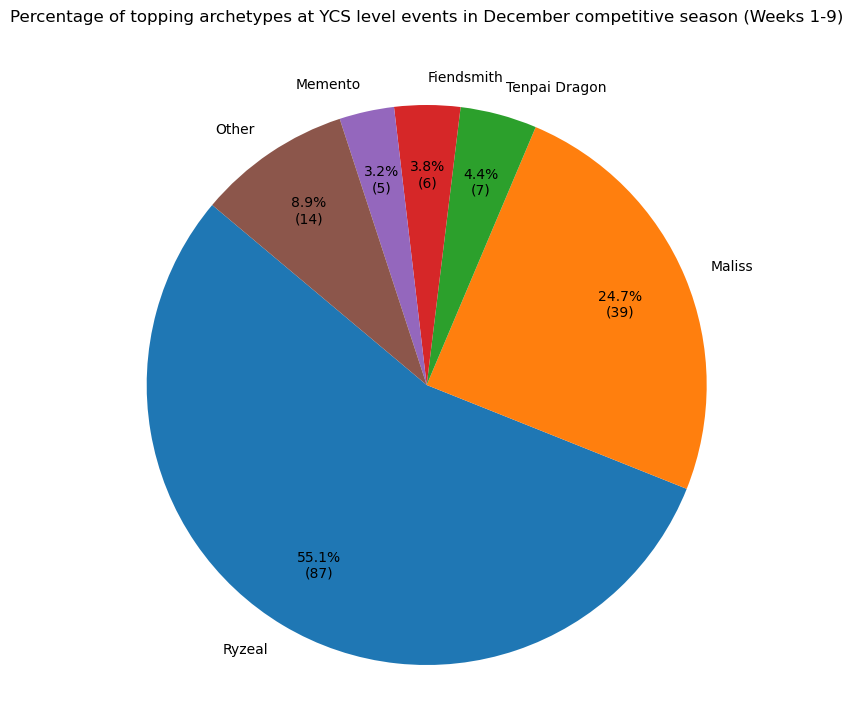

In [5]:
ycs_df = df_clean[df_clean['Event'].str.contains('YCS', case=False, na=False)]
ycs_deck = ycs_df['Deck'].value_counts()

# Filter deck types with less than 5 occurrences and group them into "Other"
other_deck = ycs_deck.copy()
other_deck[other_deck < 5] = 0
other_deck['Other'] = ycs_deck[ycs_deck < 5].sum()
other_deck = other_deck[other_deck > 0]

# Plot pie chart with percentage and number of topping decks at YCS level events
total_ycs_deck = sum(ycs_deck)
plt.figure(figsize=(10, 8))
plt.pie(other_deck, labels=other_deck.index, autopct=lambda pct:f'{pct:.1f}%\n({int(round(pct * total_ycs_deck / 100.0))})', startangle=140, pctdistance=0.75, labeldistance=1.1)
plt.axis('equal')

plt.title('Percentage of topping archetypes at YCS level events in December competitive season (Weeks 1-9)', pad=40)
plt.show()